In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:

df = pd.read_csv('report.csv')
df = df.loc[df['result'].isin(['Verified', 'Timeout', 'Parsing Error', 'Unsupported'])]
df = df.loc[df['size'] > 5]
df.loc[df['time'] > 180, 'time'] = 180
df

,file,result,msg,size,time
3,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,13,0.261
6,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,70,0.187
8,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,23,0.209
10,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,69,0.297
11,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,48,0.131
...,...,...,...,...,...
138600,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,120,0.131
138603,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Timeout,NaN,46,180.000
138604,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,283,0.143
138605,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,212,0.132


In [31]:
total = len(df)
verf = len(df.loc[df['result'] == 'Verified'])
timeout = len(df.loc[df['result'] == 'Timeout'])
other = len(df.loc[df['result'].isin(['Parsing Error', 'Unsupported'])])
print(f'Total: {total}')
print(f'Verified: {verf} {verf * 100.0 / total}%')
print(f'Timeout: {timeout} {timeout * 100.0 / total}%')
print(f'Other: {other} {other * 100.0 / total}%')

Total: 103675
Verified: 64785 62.4885459368218%
Timeout: 37367 36.04244031830239%
Other: 1523 1.4690137448758138%


In [32]:
df = pd.read_csv('report.csv')
df = df.loc[df['result'].isin(['Verified', 'Timeout'])]
df = df.loc[df['size'] > 5]
df.loc[df['time'] > 180, 'time'] = 180
# df.loc[df['result'] == 'Parsing Error', 'time'] = 180
# df.loc[df['result'] == 'Unsupported', 'time'] = 180
df

,file,result,msg,size,time
3,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,13,0.261
6,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,70,0.187
8,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,23,0.209
10,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,69,0.297
11,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,48,0.131
...,...,...,...,...,...
138600,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,120,0.131
138603,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Timeout,NaN,46,180.000
138604,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,283,0.143
138605,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,212,0.132


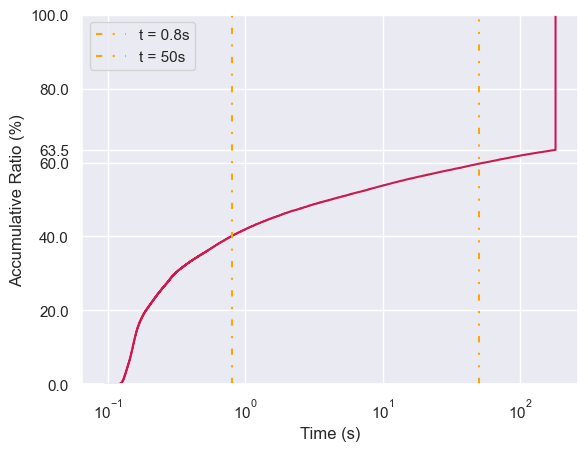

In [187]:

df1 = df[['time', 'size']].copy()
df1['hue'] = 0
df1 = df1.loc[df1['time'] > 0]

df1['Size of Program'] = 'overall'

sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(1,1)

ax.set_ylabel('Accumulative Ratio (%)')
ax.set_yticks([0,20,40,60,63.5,80,100])
ax.set_ylim(0,100)
ax.set_xlabel('Time (s)')
g = sns.ecdfplot(data=df1, x="time", ax=ax, stat='percent', log_scale=(True, False), palette='rocket', hue='hue')
ax.axvline(x=0.8, color='orange', ls=(0,(3,5,1,5)), label='t = 0.8s')
ax.axvline(x=50, color='orange', ls=(0,(3,5,1,5,1,5)), label='t = 50s')
ax.legend()

fig.savefig('analysis.png', dpi=300)

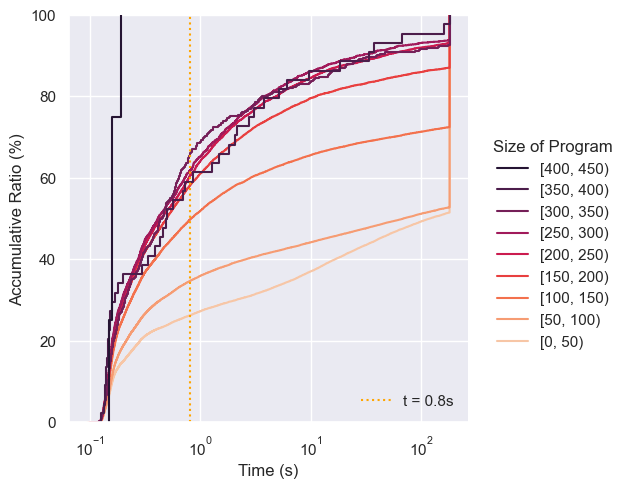

In [162]:
df3 = df[['time', 'size']]
df3 = df3.loc[df3['time'] > 0]

df0 = pd.DataFrame()
splits = np.arange(0,500,50)

pre = None
for split in splits:
    if pre == None:
        pre = split
    else:
        df2 = df3.loc[(df3['size'] >= pre) & (df3['size'] < split)].copy()
        df2['Size of Program'] = f'[{pre}, {split})'
        df0 = pd.concat([df2, df0])
        pre = split

grid = sns.displot(data=df0, x='time', hue='Size of Program', kind='ecdf', log_scale=(True, False), palette='rocket', stat = 'percent')
ax = grid.ax
ax.set_xlabel('Time (s)')
ax.set_ylabel('Accumulative Ratio (%)')
ax.set_ylim(0,100)
ax.axvline(x=0.8, color='orange', ls=':', label='t = 0.8s')
ax.legend(frameon=False)

grid.savefig('scale.png', dpi=300)

In [60]:
# grid = sns.displot(data=df0, x='time', hue='Size of Program', stat='percent',log_scale=(True, False), multiple='dodge', palette='rocket', kde = False)
# ax = grid.ax
# ax.set_xlabel('Time (s)')
# ax.set_ylabel('Ratio (%)')
# plt.savefig('sacle2.png', dpi=300)

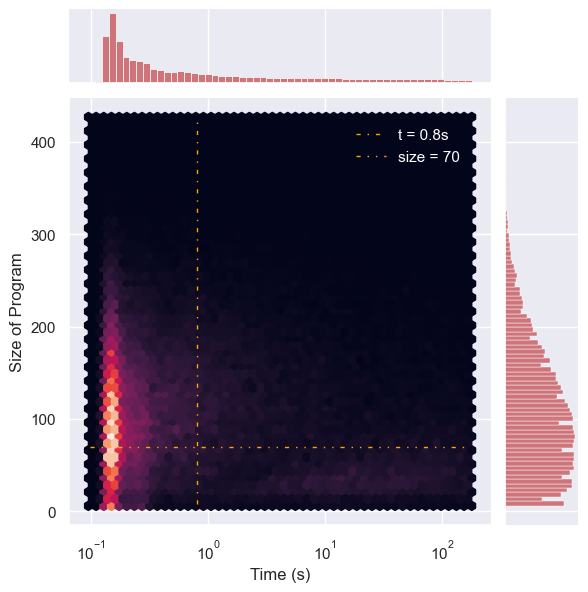

In [158]:
df2 = df.loc[df['time'] < 180].copy()
df2['hue'] = 0
plot = sns.jointplot(data=df2, x='time', y='size', kind='hex' , xscale='log', cmap = 'rocket', color='r')
ax = plot.ax_joint
ax.set_xlabel('Time (s)')
ax.set_ylabel('Size of Program')
ax.axvline(x=0.8, ymin=0.05,ymax=0.95, color='orange', ls=(0, (3,5,1,5)), linewidth= 1, label='t = 0.8s')
ax.axhline(y=70,xmin=0.05,xmax=0.95, color='orange', ls=(0,(3,5,1,5,1,5)), linewidth= 1, label='size = 70')
ax.legend(frameon = False)
sns.move_legend(ax, "upper right", bbox_to_anchor=(0.96, 0.96))
l = ax.legend_.get_texts()
for t in l:
    t.set_color('white')
plt.savefig('scale_dist.png', dpi = 300)